#О задаче
Решение задачи B чемпионата RuCode осени 2023 направления ИИ моей команды (Мой гитхаб: https://github.com/Lex-TS, сокомандника: https://github.com/Lebedkina)

Для решения задачи классификации использовался XGBClassifier. Результаты прогнозирования записываются в csv файл.

По этой задаче мы получили 29.86 баллов из 30 возможных на открытом датасете, а на закрытом тесте 76.51 из 100 в сумме за две задачи A и B. По закрытому датасету для задач A и B заняли 10 место из 15, 1 место по этой задаче в дивизионе Начинающие заняла команда с 81.42 баллами

#Загрузка необходимых библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Загрузка данных

In [ ]:
data = pd.read_csv('mars-train-class.csv')
test = pd.read_csv('mars-test-class.csv')

In [ ]:
test_private = pd.read_csv('mars-private_test-class.csv')

#Работа с данными

In [ ]:
data.head()

,№ испытания,Модуль сигнала,Тип_измерения,Количество импульсов,Фаза Hor,Фаза Ver,Уровень шума,Азимут,У.М.,Секунда,Дальность (м),Доля сигнала в ВП,Тип марсианина
0,1,908.17,1,1,0.000000,1.570796,83.533212,-26.816982,12.239598,1869.714463,3055.921963,0.791666,0
1,1,1516.59,1,1,1.263076,2.013683,85.718564,27.560049,11.695174,1869.770336,2940.934511,0.696507,1
2,1,5478.08,1,1,0.208487,-1.070217,89.123510,29.888658,11.727221,1869.798273,2912.276979,0.987292,1
3,1,1464.07,1,1,1.708077,0.629192,89.232579,27.540041,11.842715,1869.951925,2934.124901,0.619753,1
4,1,5779.23,1,1,-2.917333,2.235615,92.905241,29.795642,11.873967,1869.979862,2906.192231,0.978748,1


In [ ]:
test.head()

,№ испытания,Модуль сигнала,Тип_измерения,Количество импульсов,Фаза Hor,Фаза Ver,Уровень шума,Азимут,У.М.,Секунда,Дальность (м),Доля сигнала в ВП
0,1,1749.08,4,1,0.151208,2.347113,79.779245,26.888562,17.581266,2.099242e+03,2382.801774,0.905984
1,1,2683.67,4,1,-0.682615,-1.108392,88.330279,-0.255358,14.890269,2.021536e+03,2609.928281,0.888412
2,3,1163.79,4,1,-2.037547,0.189669,77.647435,9.589087,16.920903,1.476150e+06,2446.814144,0.137956
3,3,2151.02,4,1,0.087765,2.700544,76.039159,12.033166,19.712857,1.476127e+06,2212.081701,0.763111
4,1,2291.88,4,1,0.599778,0.379367,80.451508,28.334742,13.255509,2.050144e+03,2765.793808,0.813033


In [ ]:
Vp = data['Тип марсианина']
Vp.mean()

0.8871170793117918

In [ ]:
data['Тип марсианина'].value_counts()

1    10570
0     1345
Name: Тип марсианина, dtype: int64

#Графики для нахождения и отсеивания ненужных признаков

(13.5, -0.5)

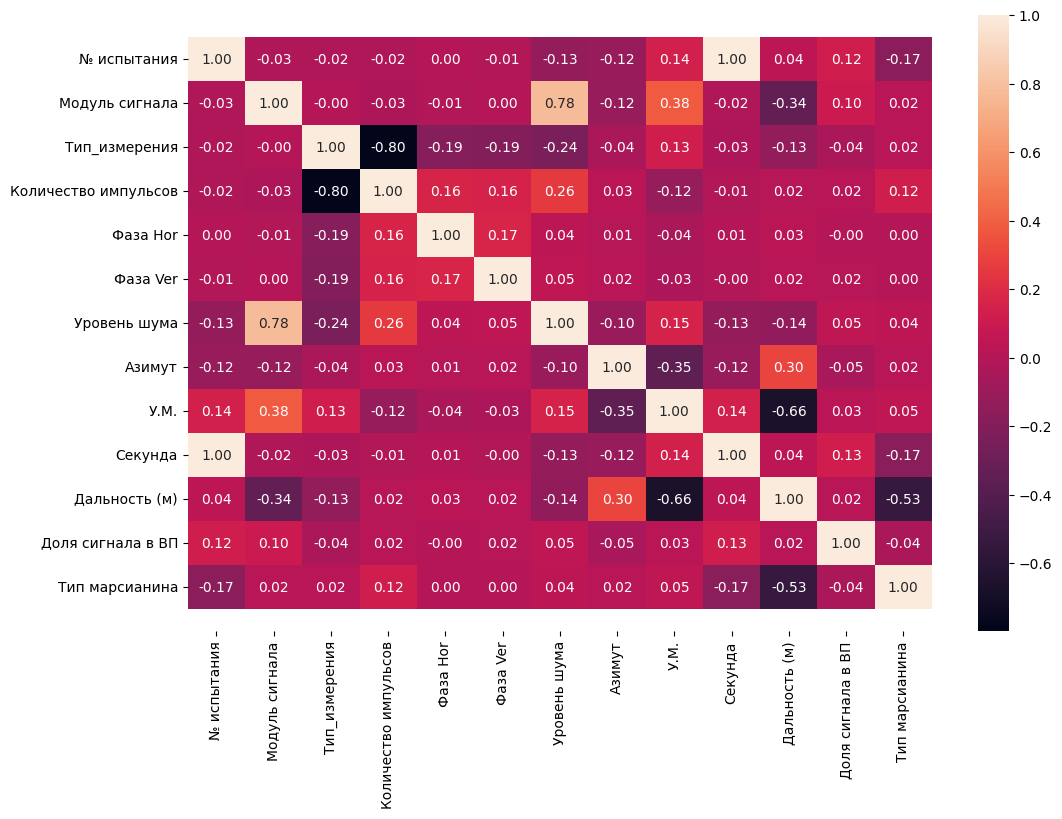

In [ ]:
import seaborn as sns
import warnings

plt.figure(figsize = (12,8))
ax = sns.heatmap(data.corr(), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

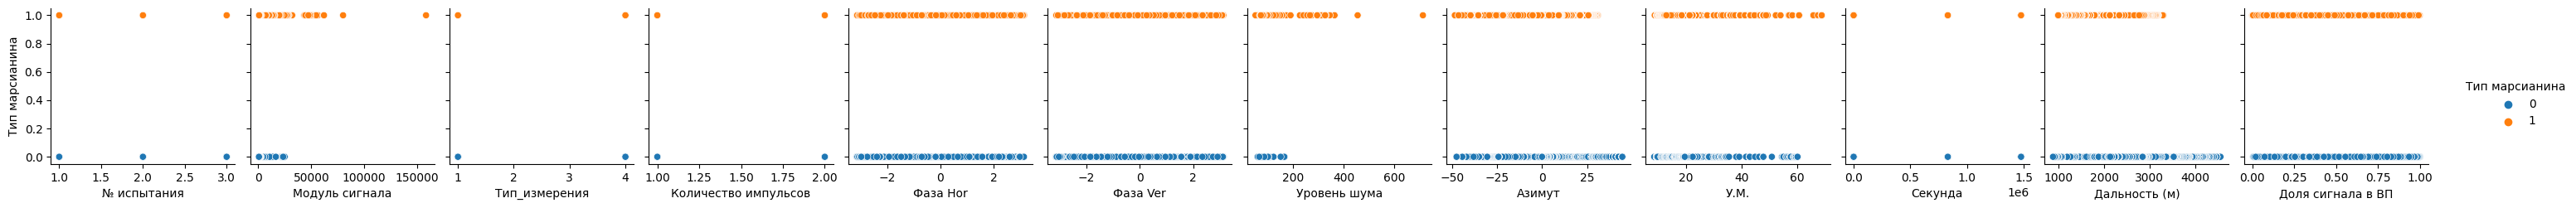

In [ ]:
sns.pairplot(data=data, y_vars=["Тип марсианина"], x_vars=data.columns.drop("Тип марсианина"), hue='Тип марсианина')

#Обучение модели

In [ ]:
from sklearn.model_selection import train_test_split

y = data['Тип марсианина'].copy()

X = data[['Модуль сигнала', 'Уровень шума', 'Азимут','Секунда', 'У.М.', 'Дальность (м)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)

In [ ]:
y

0        0
1        1
2        1
3        1
4        1
        ..
11910    1
11911    1
11912    1
11913    1
11914    1
Name: Тип марсианина, Length: 11915, dtype: int64

In [ ]:
y_train[y_train.isnull()]

Series([], Name: Тип марсианина, dtype: int64)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve (model, X_train, X_test, y_train, y_test):
  y_train_proba = model.predict_proba(X_train)[:, 1]
  y_test_proba = model.predict_proba(X_test)[:, 1]

  plt.figure(figsize=(12,10))

  print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
  print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')

  plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
  plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

  plt.plot([0,1], [0,1], linestyle='--', color='black')
  plt.grid(True)
  plt.legend()
  plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

def search(X, y, model, param_name, grid, draw=True):
  parameters = {param_name: grid}

  CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='f1_macro', n_jobs=-1)
  CV_model.fit(X, y)
  means = CV_model.cv_results_['mean_test_score']
  error = CV_model.cv_results_['std_test_score']

  if draw:
    plt.figure(figsize=(15,8))
    plt.title('choose ' + param_name)

    plt.plot(grid, means, label='mean values of score')

    plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='deviation area between errors')
    plt.legend()
    plt.xlabel('parameter')
    plt.ylabel('f1_macro')
    plt.show()

  return means, error

In [ ]:
X_train

,Модуль сигнала,Уровень шума,Азимут,У.М.,Дальность (м)
9478,854.04,80.144131,-0.052104,9.630192,4473.147670
2618,1477.99,75.670306,11.957449,16.735949,2438.064766
4453,3567.68,78.321682,-0.001962,21.299057,2104.700185
724,1173.91,83.600637,14.330609,21.797565,2107.058535
8564,471.68,74.803701,-13.978118,11.788591,2911.062071
...,...,...,...,...,...
7291,976.08,85.914889,-0.050221,9.288430,4361.437406
11633,454.71,79.543258,-3.812487,14.160115,2640.158046
1344,2680.15,91.035198,25.440393,19.326455,2254.113428
7293,1033.65,87.281230,-0.056562,9.287320,4361.590545


#Выбор оптимальных параметров для бустинга

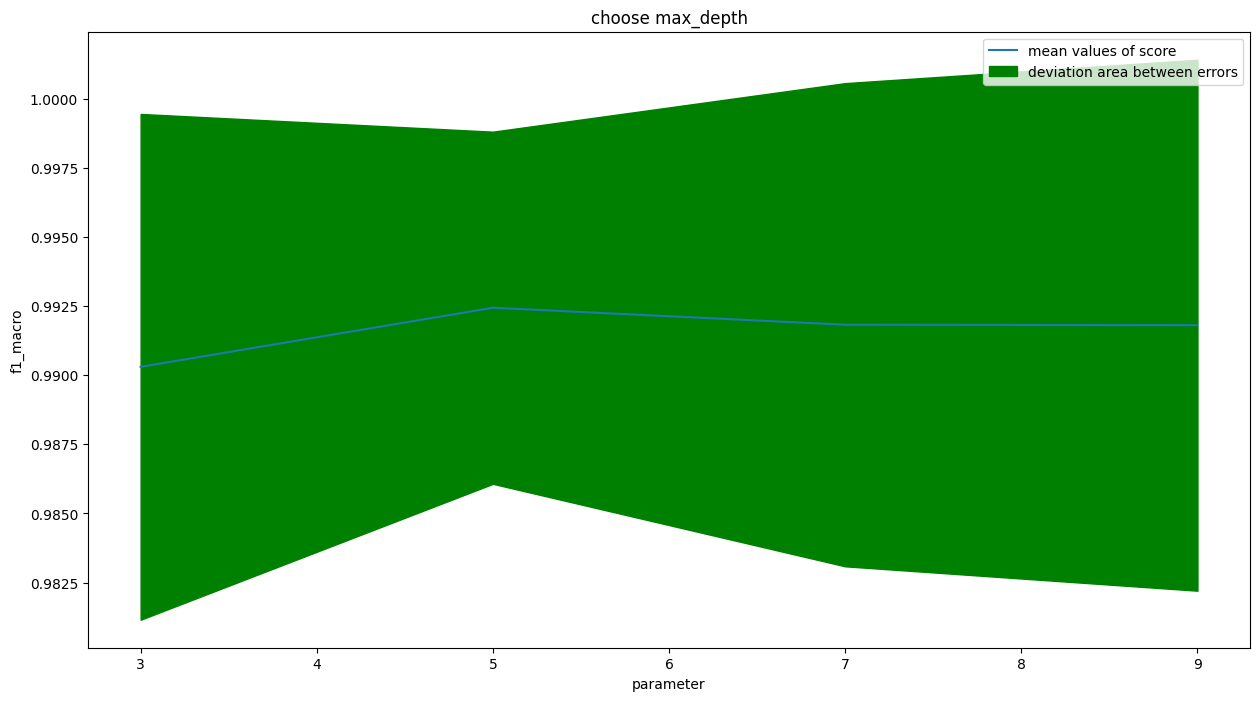

In [ ]:
import xgboost

models = [xgboost. XGBClassifier(n_estimators=300)]
param_names = ['max_depth']
grids = [np.arange(3,10,2)]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, param_names, grids, param_scales):
  search(X_train, y_train, model, param_name, grid, param_scale)

#Обучение модели с помощью XGBClassifier

In [ ]:
model = xgboost.XGBClassifier(max_depth=8, n_estimators=400).fit(X_train, y_train)
#plot_roc_curve(model, X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))

0.9957590122472608


#Использование модели для прогнозирования

In [ ]:
# Количество параметров должно совпадать с тем, которое использовалось при обучении
X = test[['Модуль сигнала', 'Уровень шума', 'Азимут','Секунда', 'У.М.', 'Дальность (м)']]

y_pred = model.predict(X)

#Запись в csv файл

In [ ]:
new_pred = test.copy()
new_pred["Тип марсианина"] = y_pred
new_pred

,№ испытания,Модуль сигнала,Тип_измерения,Количество импульсов,Фаза Hor,Фаза Ver,Уровень шума,Азимут,У.М.,Секунда,Дальность (м),Доля сигнала в ВП,Тип марсианина
0,1,3034.42,4,1,1.570796,1.570796,82.289822,-21.796051,14.470102,1.876713e+03,2846.712794,0.702408,0
1,1,3007.74,4,1,-1.177580,0.042901,99.758760,-21.793055,14.471338,1.876713e+03,2846.600492,0.777598,0
2,1,3324.61,4,1,2.008799,3.019872,80.054893,-21.789997,14.472575,1.876713e+03,2846.477980,0.815011,0
3,1,3182.46,4,1,-0.762080,0.362214,78.393073,-21.787002,14.473810,1.876727e+03,2846.365678,0.889261,0
4,1,3174.68,4,1,-3.002787,-1.869907,93.309789,-21.783943,14.475048,1.876727e+03,2846.253375,0.761554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,3,691.73,4,1,0.090151,0.881038,76.344553,-21.593132,65.897805,1.476151e+06,1010.507238,0.552768,1
2551,3,825.93,4,1,-0.098148,0.608125,95.308732,-21.604149,65.900535,1.476151e+06,1010.486819,0.371986,1
2552,3,983.40,4,1,0.521566,1.706500,84.191594,-21.615169,65.903265,1.476151e+06,1010.466401,0.320904,1
2553,3,950.55,4,1,1.879662,2.728574,84.120203,-21.637076,65.908734,1.476151e+06,1010.425563,0.356461,1


In [ ]:
new_pred.to_csv('BPrivate.csv',index=False)